============================================= Markov Decision Process (MDP) =============================================

#### Markov Decision Process (MDP)

This section introduces the foundation of reinforcement learning: **Markov Decision Processes (MDPs)**. MDPs are mathematical models used to describe how systems evolve over time under a sequence of decisions. They form the basis for defining RL problems and later solution methods like Value Iteration and Q-Learning. 

##### Definition of an MDP

A **Markov Decision Process (MDP)** is a tuple: $\text{MDP}: (\mathcal{S}, \mathcal{A}, T, r)$

Where:

- **$\mathcal{S}$** — set of *states* the agent can be in (e.g., positions in a gridworld).  
- **$\mathcal{A}$** — set of *actions* the agent can take at each state.  
- **$T: \mathcal{S} \times \mathcal{A} \times \mathcal{S} \to [0,1]$** — *transition function* (probability distribution): $$T(s, a, s') = P(s_{t+1}=s' \mid s_t=s, a_t=a)$$
  This encodes how likely it is to move to state $s'$ after taking action $a$ in state $s$.

  So in an MDP, even when the current state $s$ and action $a$ are fixed, the next state $s'$ is generally **not deterministic**. Instead, the environment transitions according to above probability distribution.
- **$r: \mathcal{S} \times \mathcal{A} \to \mathbb{R}$** — *reward function*: immediate reward received when taking action $a$ in state $s$.  
  Larger rewards indicate more desirable actions relative to the task.
  
  when the current state $s$ and action $a$ are fixed, d2l assume the reward is fixed, but no necessary ot fixed in the most general MDP definition.

##### Return and Discount Factor

A **trajectory** in an MDP is a sequence generated by interacting with the environment:

$$
\tau = (s_0, a_0, r_0, s_1, a_1, r_1, s_2, a_2, r_2, \dots)
$$

- **Return** of a trajectory is the sum of rewards obtained along it:
  $R(\tau) = r_0 + r_1 + r_2 + \cdots$

- To handle potentially infinite trajectories and emphasize near-term rewards, we introduce a **discount factor** $\gamma < 1$:

  $
  R(\tau) = r_0 + \gamma r_1 + \gamma^2 r_2 + \cdots = \sum_{t=0}^\infty \gamma^t r_t
  $

  - Smaller $\gamma$ biases the agent toward near-term rewards.  
  - Larger $\gamma$ (close to 1) encourages long-term planning.

The **goal in reinforcement learning** is to *find the trajectory (policy) that maximizes expected return*.

##### Discussion of the Markov Assumption

The **Markov property** means the next state depends *only* on the current state and action — not on any earlier history.

##### Why this matters

- If the system has **memory** (e.g., velocity depending on previous state), it may *not* be Markovian.
- However, we can often *augment* the state to include necessary history (e.g., current location + velocity) so that the Markov assumption holds.

This assumption simplifies modeling and algorithms, and most RL techniques rely on it. 

##### Summary

- An MDP is a formal way to represent **sequential decision making under uncertainty**.  
- Defined by states, actions, transition probabilities, and rewards.  
- The objective is to choose actions that maximize *expected discounted return*.  
- Markov property simplifies modeling by assuming the future depends only on the current state and action. 

##### Additional Notes

- MDPs are the backbone of RL algorithms like Value Iteration and Q-Learning.
- In full RL problems, the agent often **doesn’t know** the exact transition function; it must learn optimal actions from experience. 

==================================== Value Iteration ====================================

### Value Iteration

This section introduces **Value Iteration**, a dynamic programming method for computing the **optimal value function** in a Markov Decision Process (MDP). It is one of the foundational algorithms in reinforcement learning when the environment model (transition and reward functions) is known.

#### Stochastic Policy

In an MDP, a **stochastic policy** $\pi(a|s)$ defines a probability distribution over actions $a \in \mathcal{A}$ for each state $s \in \mathcal{S}$. The goal is to find a policy that maximizes cumulative rewards.

#### Value Function

The **value function** $V^\pi(s)$ estimates the expected *discounted return* starting from state $s$ when following policy $\pi$.

#### Action-Value Function

The **action-value function** $Q^\pi(s,a)$ gives the expected return starting from state $s$, taking action $a$, and thereafter following policy $\pi$.

#### Optimal Stochastic Policy

An **optimal policy** $\pi^*$ maximizes the expected return for all states — and corresponds to the **optimal value function** $V^*(s)$.

#### Principle of Dynamic Programming

Value iteration uses the **Bellman Optimality Equation**:

$$
V^*(s) = \max_{a\in \mathcal{A}} \left\{r(s,a) + \gamma \sum_{s'\in \mathcal{S}} P(s'|s,a)\,V^*(s') \right\}
$$

This identity expresses that the best return from $s$ equals the best immediate action value plus the discounted value of successor states. It’s derived from the **principle of dynamic programming** — optimal substructure: *the remainder of an optimal trajectory is also optimal*.

#### Value Iteration Algorithm

##### Core Idea

Value iteration treats the Bellman Optimality Equation as a set of constraints and iteratively updates the value function until convergence.
##### Update Rule

Initialize the value function $V_0(s)$ arbitrarily (e.g., zero for all $s$). Then at iteration $k$, update:

$$
V_{k+1}(s)
= \max_{a\in \mathcal{A}}\Big\{r(s,a)
+ \gamma \sum_{s'\in \mathcal{S}}P(s'\mid s,a)\,V_k(s')\Big\},\quad \forall s\in \mathcal{S}.
$$

Continue until the values converge (changes between iterations are negligible).

##### Convergence

As $k\rightarrow \infty$, the sequence $\{V_k\}$ converges to the **optimal value function** $V^*$ regardless of initialization: $V^*(s) = \lim_{k\to\infty} V_k(s)\quad \forall s.$

Once $V^*$ is found, the corresponding **optimal policy** $\pi^*$ can be extracted by choosing actions that maximize the value at each state:

$$
\pi^*(s) = \arg\max_{a\in\mathcal{A}} \left\{
r(s,a) + \gamma \sum_{s'}P(s'|s,a)\,V^*(s')
\right\}.
$$

#### Policy Evaluation & Improvement (Implicit)

Unlike policy iteration — which separates evaluation and improvement — value iteration implicitly performs both in a single update: the value function is both evaluated under the current estimate and improved by choosing the maximizing action.

#### Implementation of Value Iteration

Typical implementations loop over states and actions, computing the Bellman update (often with a convergence threshold $\theta$ to stop early). Efficient implementations store temporary values and track the largest change to detect convergence.

#### Summary

- **Value iteration** is a dynamic programming algorithm for computing the optimal value function and policy in an MDP when the model (transition and reward functions) is fully known.  
- It iteratively applies the Bellman Optimality update until values stabilize.  
- It guarantees convergence to the optimal value function as the number of iterations goes to infinity.  
- Once converged, you can derive the optimal policy by selecting actions that maximize the value function. 

In [3]:
%matplotlib inline
import random
import numpy as np
import gymnasium as gym
from d2l import torch as d2l

seed = 0  # Random number generator seed
gamma = 0.95  # Discount factor
num_iters = 10  # Number of iterations
random.seed(seed)  # Set the random seed to ensure results can be reproduced
np.random.seed(seed)

def make_frozen_lake_env(seed):
    """Create FrozenLake environment using Gymnasium API"""
    env = gym.make('FrozenLake-v1', is_slippery=False)
    env.reset(seed=seed)
    env.action_space.seed(seed)
    
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    
    # Build env_info dictionary compatible with d2l's value_iteration
    env_info = {
        'env': env,
        'desc': env.unwrapped.desc,  # Grid description (e.g., 'SFFF', 'FHFH', etc.)
        'num_states': num_states,
        'num_actions': num_actions,
        'mdp': env.unwrapped.P,  # Transition dynamics: mdp[s][a] = [(prob, next_s, reward, terminated), ...]
        'trans_prob_idx': 0,     # Index of transition probability in tuple
        'nextstate_idx': 1,      # Index of next state in tuple
        'reward_idx': 2,         # Index of reward in tuple
    }
    
    return env_info

# Create FrozenLake environment
env_info = make_frozen_lake_env(seed)
print(f"Number of states: {env_info['num_states']}, Number of actions: {env_info['num_actions']}")

Number of states: 16, Number of actions: 4


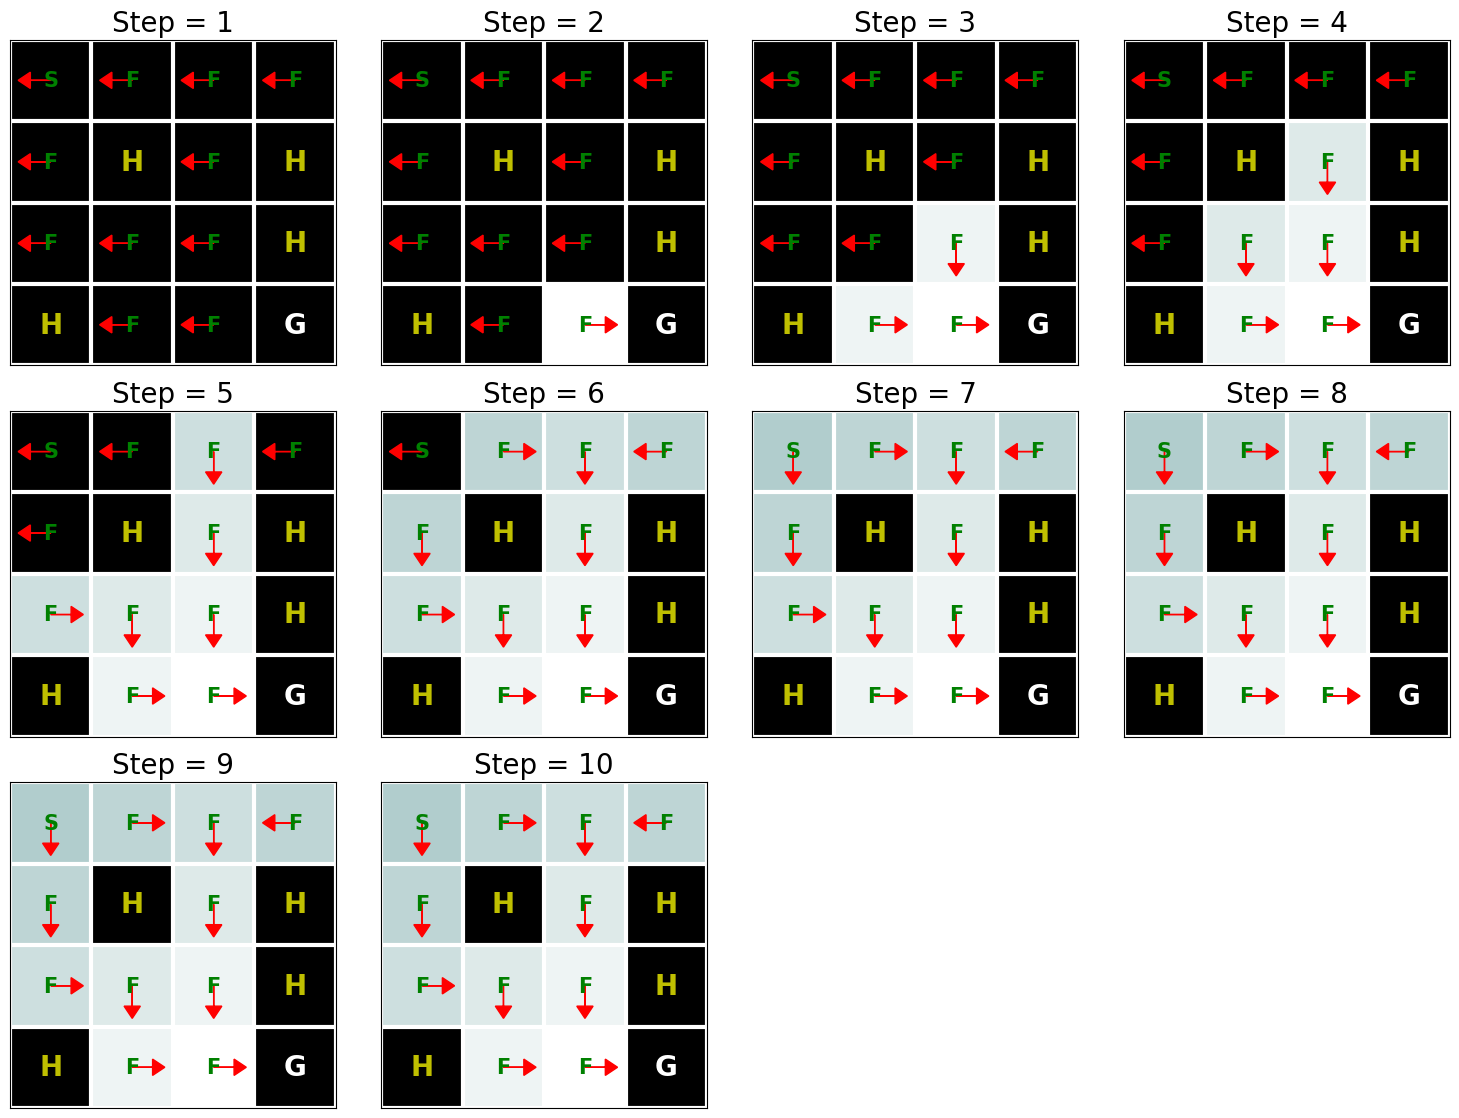

In [5]:
def value_iteration(env_info, gamma, num_iters):
    env_desc = env_info['desc']  # 2D array shows what each item means
    prob_idx = env_info['trans_prob_idx']
    nextstate_idx = env_info['nextstate_idx']
    reward_idx = env_info['reward_idx']
    num_states = env_info['num_states']
    num_actions = env_info['num_actions']
    mdp = env_info['mdp']

    V  = np.zeros((num_iters + 1, num_states))
    Q  = np.zeros((num_iters + 1, num_states, num_actions))
    pi = np.zeros((num_iters + 1, num_states))

    for k in range(1, num_iters + 1):
        for s in range(num_states):
            for a in range(num_actions):
                # Calculate \sum_{s'} p(s'\mid s,a) [r + \gamma v_k(s')]
                # Note: Gym's env.P uses mdp[s][a], not mdp[(s,a)]
                for pxrds in mdp[s][a]:
                    # mdp[s][a]: [(p1,next1,r1,d1),(p2,next2,r2,d2),..]
                    pr = pxrds[prob_idx]  # p(s'\mid s,a)
                    nextstate = pxrds[nextstate_idx]  # Next state
                    reward = pxrds[reward_idx]  # Reward
                    Q[k,s,a] += pr * (reward + gamma * V[k - 1, nextstate])
            # Record max value and max action
            V[k,s] = np.max(Q[k,s,:])
            pi[k,s] = np.argmax(Q[k,s,:])
    d2l.show_value_function_progress(env_desc, V[:-1], pi[:-1])

value_iteration(env_info=env_info, gamma=gamma, num_iters=num_iters)

====================================== Q-Learning ======================================

### Q-Learning

In the previous section we saw **Value Iteration**, which requires knowing the full **Markov Decision Process (MDP)** — specifically the transition and reward functions.  
**Q-Learning** (Watkins & Dayan, 1992) is a **model-free reinforcement learning algorithm** that learns action values from data collected by interacting with the environment, without requiring full knowledge of the MDP. 

#### The Q-Learning Algorithm

Recall the **value iteration update** for the action-value function:

$$
Q_{k+1}(s,a)
= r(s,a)
+ \gamma \sum_{s'\in\mathcal{S}} P(s'|s,a)\max_{a'\in\mathcal{A}}Q_k(s',a')
$$

Implementing this exactly requires knowing the transitions $P(s'|s,a)$.  
**Q-Learning replaces this expectation with samples** gathered by the agent interacting with the environment — in other words, the robot “gets its own data” rather than relying on a model.

The core idea is that as the agent collects transitions $(s_t,a_t,r_t,s_{t+1})$, it updates its estimate of the optimal action-value function using samples instead of summation over the full state space.

#### Optimization Perspective Underlying Q-Learning

Imagine the agent collects a dataset of $n$ trajectories of length $T$ using some exploration policy $\pi_e(a|s)$. The dataset is:

$\{(s^i_t,a^i_t,r^i_t,s^i_{t+1}) \}_{i=1..n, t=0..T-1}$

We can frame Q-Learning as minimizing the **temporal-difference error** over this dataset:

$$
\hat{Q}
= \arg\min_Q
\frac{1}{nT}\sum_{i,t}
\Big(
Q(s^i_t,a^i_t)
- \Big[r(s^i_t,a^i_t)
+ \gamma \max_{a'} Q(s^i_{t+1},a')\Big]
\Big)^2
$$

When $Q$ is updated via gradient descent on this loss (with learning rate $\alpha$), it yields the familiar **sample update rule**:

$$
Q(s_t,a_t)
\leftarrow
Q(s_t,a_t)
+ \alpha
\Big[
r_t + \gamma \max_{a'}Q(s_{t+1},a')
- Q(s_t,a_t)
\Big]
$$

If $s_{t+1}$ is terminal (no future actions), the $\max_{a'}$ term is set to zero.

#### Exploration

Because the agent does not know the environment in advance, it needs to **explore** to discover good actions.

A typical strategy is **ε-greedy**:
- With probability $1-\epsilon$: pick $\arg\max_a Q(s,a)$ (exploit current knowledge)
- With probability $\epsilon$: pick a random action (explore)

Alternatively, a **softmax (Boltzmann) policy** can be used:
$$
\pi_e(a|s)
= \frac{e^{Q(s,a)/T}}{\sum_{a'}e^{Q(s,a')/T}}
$$
where $T$ is a temperature parameter controlling randomness.

Exploration must cover the state–action space sufficiently; otherwise $Q$ estimates will be poor for unvisited regions.

#### Self-Correcting Property of Q-Learning

As learning progresses:
- Actions with high estimated value are chosen more often.
- If an action’s estimate is too high, future rewards will correct it downward.
- Good actions are reinforced because they yield better outcomes.

This **self-correcting feedback** explains why Q-Learning can converge to the optimal value function even when starting from a random policy, given sufficient exploration.

#### Implementation Notes

D2L demonstrates Q-Learning on the *FrozenLake* environment:
- A 4×4 grid where the agent must reach the goal while avoiding holes.
- Rewards: +1 at goal, 0 elsewhere.
- Transitions may be stochastic or deterministic depending on the environment setup.
- Q-Learning iteratively improves $Q$ via sample updates as the agent interacts with the environment.

Compared to value iteration, Q-Learning typically requires **more interactions** because it does not have access to the full model of the MDP.

#### Summary

- **Q-Learning** is a fundamental model-free RL algorithm.
- It learns the **optimal action-value function** $Q^*(s,a)$ directly from experience, without needing the full MDP.
- It does this by replacing expectations over transitions with sampled transitions collected by the agent.
- Exploration strategies like ε-greedy are critical to ensure sufficient coverage of the state–action space.
- Q-Learning exhibits a self-correcting mechanism where poor estimates get corrected through interaction over time.

#### Optional Next Steps

- **Deep Q-Learning (DQN):** extend Q-Learning with neural networks to handle large/continuous state spaces.  
- **Off-policy vs on-policy:** Q-Learning is off-policy — it learns about the optimal policy while following another (exploration) policy.  
- **Convergence conditions:** learning rate schedules and sufficient exploration are key to guarantee convergence.

In [14]:
%matplotlib inline
import random
import numpy as np
import gymnasium as gym
from d2l import torch as d2l

seed = 0  # Random number generator seed
gamma = 0.95  # Discount factor
num_iters = 256  # Number of iterations
alpha   = 0.9  # Learing rate
epsilon = 0.9  # Epsilon in epsilion gready algorithm
random.seed(seed)  # Set the random seed
np.random.seed(seed)

# Now set up the environment
env_info = make_frozen_lake_env(seed)

In [15]:
def e_greedy(env, Q, s, epsilon):
    if random.random() < epsilon:
        return env.action_space.sample()

    else:
        return np.argmax(Q[s,:])

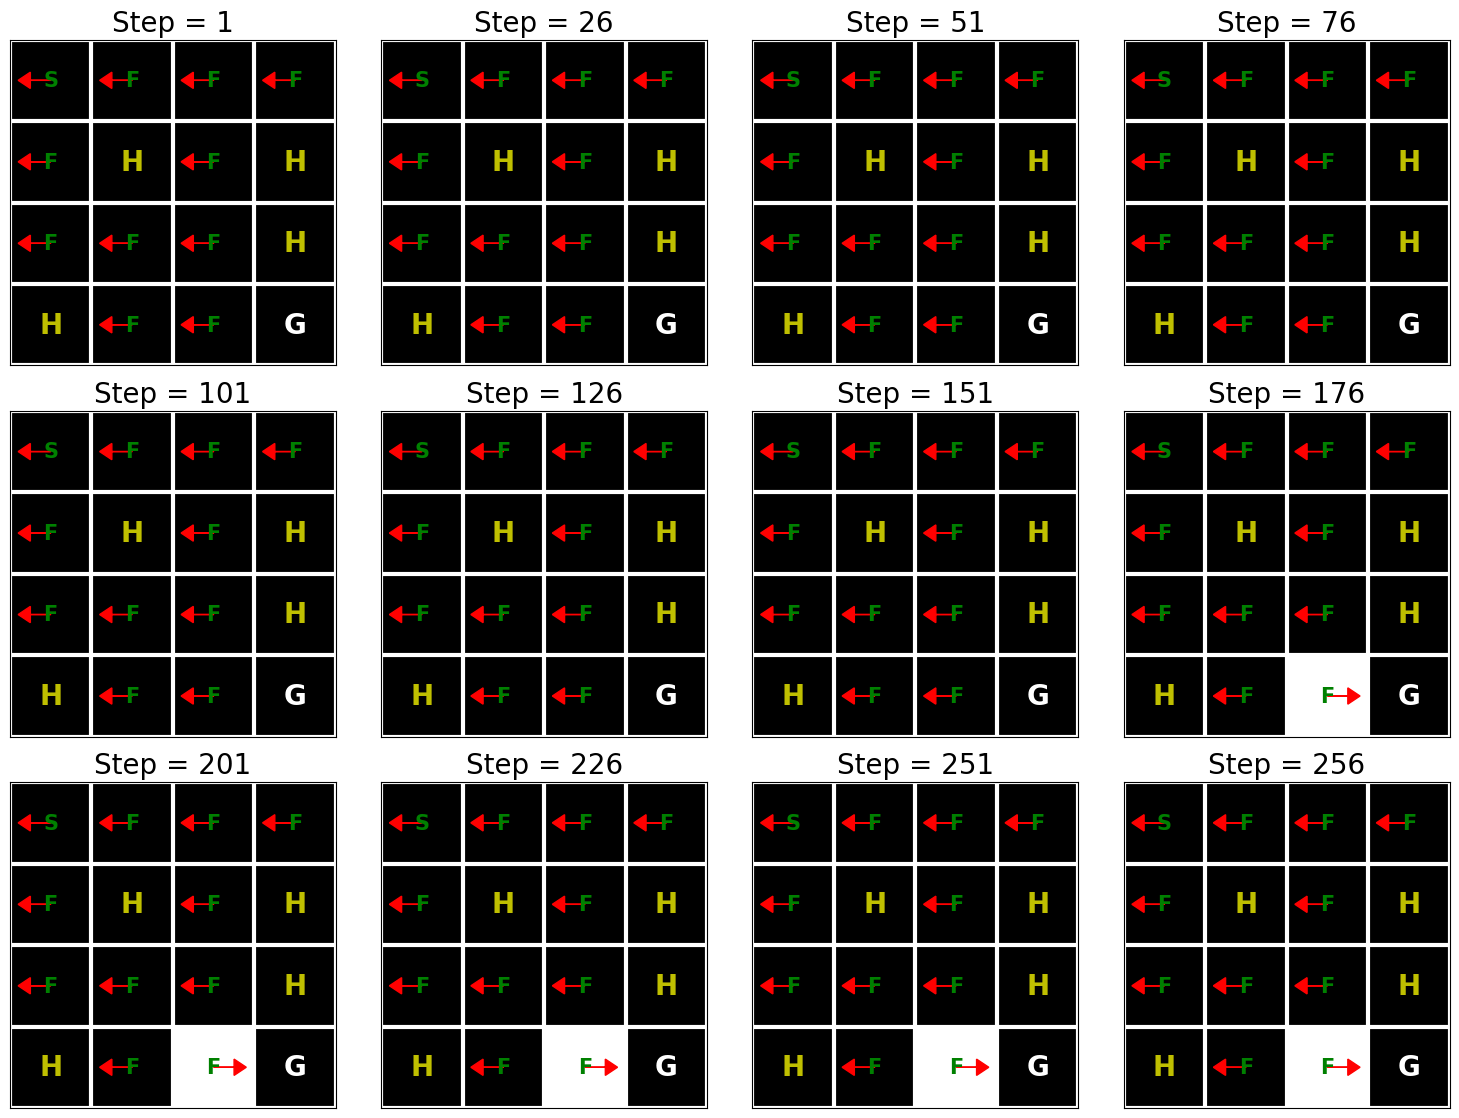

In [16]:
def q_learning(env_info, gamma, num_iters, alpha, epsilon):
    env_desc = env_info['desc']  # 2D array specifying what each grid item means
    env = env_info['env']  # 2D array specifying what each grid item means
    num_states = env_info['num_states']
    num_actions = env_info['num_actions']

    Q  = np.zeros((num_states, num_actions))
    V  = np.zeros((num_iters + 1, num_states))
    pi = np.zeros((num_iters + 1, num_states))

    for k in range(1, num_iters + 1):
        # Reset environment (Gymnasium returns (obs, info))
        state, _ = env.reset()
        done = False
        while not done:
            # Select an action for a given state and acts in env based on selected action
            action = e_greedy(env, Q, state, epsilon)
            # Gymnasium returns (obs, reward, terminated, truncated, info)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Q-update:
            y = reward + gamma * np.max(Q[next_state,:])
            Q[state, action] = Q[state, action] + alpha * (y - Q[state, action])

            # Move to the next state
            state = next_state
        # Record max value and max action for visualization purpose only
        for s in range(num_states):
            V[k,s]  = np.max(Q[s,:])
            pi[k,s] = np.argmax(Q[s,:])
    d2l.show_Q_function_progress(env_desc, V[:-1], pi[:-1])

q_learning(env_info=env_info, gamma=gamma, num_iters=num_iters, alpha=alpha, epsilon=epsilon)